In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import shutil
import random
import cv2
import argparse
import os
import pandas as pd

In [4]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# Define the dataset path
dataset_path = '/content/drive/MyDrive/flipkart_grid/complete_dataset'

# Initialize lists for storing the data and labels
data = []
labels = []

# Loop over the class folders in the dataset directory
for i, folder_name in enumerate(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, folder_name)

    # Check if the path is a directory (since there might be non-folder files)
    if not os.path.isdir(class_path):
        continue

    print(f"Processing folder: {class_path}")

    # Loop over each image file in the class folder
    for image_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, image_name)

        # Read the image
        image = cv2.imread(img_path)

        # Check if the image is loaded correctly
        if image is None:
            print(f"Failed to load image: {img_path}")
            continue

        # Convert the image to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize the image to 224x224 (for example, based on VGG input size)
        image = cv2.resize(image, (224, 224))

        # Append the processed image and label to the respective lists
        data.append(image)
        labels.append(f"day_{i+1}")  # Use i+1 to start the days from 1

    print(f"[INFO] Finished processing folder: {folder_name}")

# Convert the data and labels to NumPy arrays
data = np.array(data) / 255.0  # Normalize pixel values to range [0, 1]
labels = np.array(labels)

print(f"[INFO] Total images loaded: {len(data)}")
print(f"[INFO] Images successfully loaded")

Processing folder: /content/drive/MyDrive/flipkart_grid/complete_dataset/Day5_01_09_2024


100%|██████████| 264/264 [01:20<00:00,  3.27it/s]


[INFO] Finished processing folder: Day5_01_09_2024
Processing folder: /content/drive/MyDrive/flipkart_grid/complete_dataset/Day2_28_09_2024


100%|██████████| 264/264 [01:13<00:00,  3.58it/s]


[INFO] Finished processing folder: Day2_28_09_2024
Processing folder: /content/drive/MyDrive/flipkart_grid/complete_dataset/Day4_new_30_09_2024


100%|██████████| 264/264 [01:23<00:00,  3.16it/s]


[INFO] Finished processing folder: Day4_new_30_09_2024
Processing folder: /content/drive/MyDrive/flipkart_grid/complete_dataset/Day_6_04_10_2024


100%|██████████| 264/264 [01:14<00:00,  3.56it/s]


[INFO] Finished processing folder: Day_6_04_10_2024
Processing folder: /content/drive/MyDrive/flipkart_grid/complete_dataset/Day3_29_09_2024


100%|██████████| 264/264 [01:20<00:00,  3.28it/s]


[INFO] Finished processing folder: Day3_29_09_2024
Processing folder: /content/drive/MyDrive/flipkart_grid/complete_dataset/Day1_27_09_2024


100%|██████████| 264/264 [01:15<00:00,  3.51it/s]


[INFO] Finished processing folder: Day1_27_09_2024
Processing folder: /content/drive/MyDrive/flipkart_grid/complete_dataset/Training


 11%|█         | 1/9 [00:00<00:05,  1.40it/s]

Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Training/Day5_01_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Training/Day2_28_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Training/Day4_new_30_09_2024


 56%|█████▌    | 5/9 [00:01<00:01,  3.61it/s]

Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Training/Day_6_04_10_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Training/Day3_29_09_2024


100%|██████████| 9/9 [00:01<00:00,  5.52it/s]


Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Training/Day1_27_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Training/Training
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Training/Validation
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Training/Test
[INFO] Finished processing folder: Training
Processing folder: /content/drive/MyDrive/flipkart_grid/complete_dataset/Validation


 11%|█         | 1/9 [00:00<00:02,  2.93it/s]

Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Validation/Day5_01_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Validation/Day2_28_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Validation/Day4_new_30_09_2024


100%|██████████| 9/9 [00:00<00:00, 10.49it/s]


Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Validation/Day_6_04_10_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Validation/Day3_29_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Validation/Day1_27_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Validation/Training
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Validation/Validation
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Validation/Test
[INFO] Finished processing folder: Validation
Processing folder: /content/drive/MyDrive/flipkart_grid/complete_dataset/Test


 11%|█         | 1/9 [00:00<00:02,  3.62it/s]

Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Test/Day5_01_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Test/Day2_28_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Test/Day4_new_30_09_2024


100%|██████████| 9/9 [00:00<00:00, 12.04it/s]

Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Test/Day_6_04_10_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Test/Day3_29_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Test/Day1_27_09_2024
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Test/Training
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Test/Validation
Failed to load image: /content/drive/MyDrive/flipkart_grid/complete_dataset/Test/Test


[INFO] Finished processing folder: Test
[INFO] Total images loaded: 1584
[INFO] Images successfully loaded


In [5]:
# Now we will create a One-Hot encoding to the list of labels to make the classfication
# integer encode
lb_encoder = LabelEncoder()
labels = lb_encoder.fit_transform(labels)
labels = to_categorical(labels)


# Split the data into training and testing using the 80% of training and 20% to testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, stratify = labels,random_state = 42)


# Set the image augmentation of the training data
trainAug = ImageDataGenerator(rotation_range= 15, fill_mode='nearest')

In [9]:
INIT_LR = 1e-3
EPOCHS = 100
BS = 8
base_model = VGG16(weights = 'imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))
headmodel = base_model.output
headmodel = AveragePooling2D(pool_size =(4, 4))(headmodel)
headmodel = Flatten(name ='Flatten')(headmodel)
headmodel = Dense(64, activation = 'relu')(headmodel)
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(6, activation = 'softmax')(headmodel)

model = Model(inputs = base_model.input, outputs = headmodel)

for layers in base_model.layers:
    layers.trainable = False


opt = Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [10]:
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 1, 1, 512)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 512)                 │              

 Total params: 14,747,910 (56.26 MB)

 Trainable params: 33,222 (129.77 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
with tf.device('/gpu:0'):
    print("Training the model with gpu . . .")
    hist = model.fit(trainAug.flow(X_train, y_train, batch_size = BS),steps_per_epoch=len(X_train) // BS, validation_data=(X_test, y_test), validation_steps=len(X_test) // BS, epochs=100)

Training the model with gpu . . .
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/158 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.2646 - loss: 1.7938

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


158/158 ━━━━━━━━━━━━━━━━━━━━ 55s 279ms/step - accuracy: 0.2653 - loss: 1.7922 - val_accuracy: 0.5584 - val_loss: 1.4078
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5000 - loss: 1.3360 - val_accuracy: 0.4921 - val_loss: 1.4141
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 33s 207ms/step - accuracy: 0.4826 - loss: 1.3968 - val_accuracy: 0.7035 - val_loss: 1.0763
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7500 - loss: 0.7890 - val_accuracy: 0.7098 - val_loss: 1.0761
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 133ms/step - accuracy: 0.5649 - loss: 1.1649 - val_accuracy: 0.7098 - val_loss: 0.8976
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7500 - loss: 0.8807 - val_accuracy: 0.6972 - val_loss: 0.8999
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.6679 - loss: 0.9606 - val_accuracy: 0.7950 - val_loss: 0.7485
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8750 - loss: 0.7494 - val_

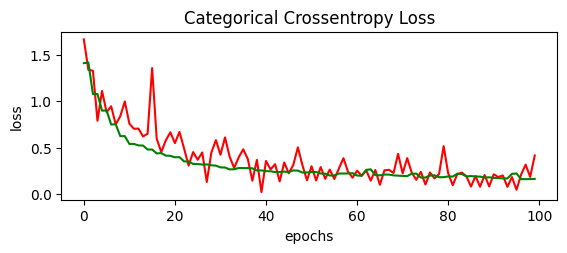

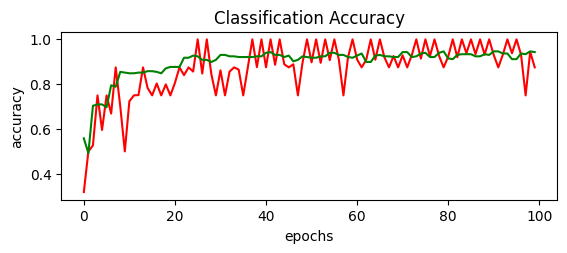

In [13]:
plt.subplot(211)
plt.title('Categorical Crossentropy Loss')
plt.plot(hist.history['loss'], color ='red', label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['val_loss'], color ='green', label='val')

plt.show()

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(hist.history['accuracy'], color='red', label='train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='test')

plt.show()

In [14]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(X_test, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), predIdxs, target_names=lb_encoder.classes_))

[INFO] evaluating network...
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step
              precision    recall  f1-score   support

       day_1       0.92      0.87      0.89        53
       day_2       0.98      0.92      0.95        53
       day_3       0.89      0.91      0.90        53
       day_4       0.96      1.00      0.98        53
       day_5       0.91      0.98      0.95        53
       day_6       1.00      0.98      0.99        52

    accuracy                           0.94       317
   macro avg       0.94      0.94      0.94       317
weighted avg       0.94      0.94      0.94       317



In [15]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(y_test.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the accuracy, sensitivity, and specificity of the test
print("accuracy: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

accuracy: 0.2997
sensitivity: 1.0000
specificity: 1.0000


In [16]:
print(cm)

[[46  0  5  2  0  0]
 [ 0 49  0  0  4  0]
 [ 4  0 48  0  1  0]
 [ 0  0  0 53  0  0]
 [ 0  0  1  0 52  0]
 [ 0  1  0  0  0 51]]


In [18]:
# Save the trained model to a folder
model_save_path = 'saved_model/my_combined_model.h5'  # Specify your folder path here
model.save(model_save_path)

print(f"Model saved at: {model_save_path}")

Model saved at: saved_model/my_combined_model.h5


In [22]:
import pandas as pd
hist_df = pd.DataFrame(hist.history)
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [23]:
model = tf.keras.models.load_model('/content/saved_model/my_combined_model.h5')


In [24]:
import itertools

def plot_confusion_matrix(cm, classes,
                           normalize=False,
                           title='Confusion matrix',
                           cmap=plt.cm.Blues):
     """
     This function prints and plots the confusion matrix.
     Normalization can be applied by setting `normalize=True`.
     """

     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)

     if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print("Normalized confusion matrix")
     else:
         print('Confusion matrix, without normalization')

     print(cm)

     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('True label')
     plt.xlabel('Predicted label')
     plt.show()


In [25]:
def score(model,shape):
  predict = model.predict(X_test, batch_size=BS)
  predict = np.argmax(predict, axis=1)
  cm = confusion_matrix(y_test.argmax(axis=1), predict)
  cm_plot_labels = ['COVID-19','Normal']
  plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion Matrix')
  accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
  recall = (cm[0][0])/(cm[0][0]+cm[1][0])
  presition = (cm[0][0])/(cm[0][0]+cm[0][1])
  specificity = (cm[1][1])/(cm[1][1]+cm[0][1])
  f1 = 2*presition*recall/(presition+recall)
  print(f'accuracy = {accuracy}\nrecall = {recall}\npresition = {presition}\nspecificity = {specificity}\nf1 = {f1}')
  fpr, tpr, threshold = metrics.roc_curve(y_test.argmax(axis=1), predict)
  roc_auc = metrics.auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step
Confusion matrix, without normalization
[[46  0  5  2  0  0]
 [ 0 49  0  0  4  0]
 [ 4  0 48  0  1  0]
 [ 0  0  0 53  0  0]
 [ 0  0  1  0 52  0]
 [ 0  1  0  0  0 51]]


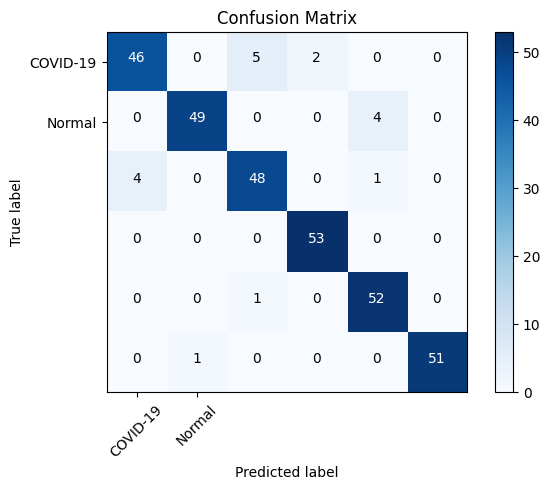

accuracy = 1.0
recall = 1.0
presition = 1.0
specificity = 1.0
f1 = 1.0


NameError: name 'metrics' is not defined

In [26]:
score(model, 224)

In [27]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Rescale heatmap to a range 0-255
    img = img*255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap*0.4+img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))

    return superimposed_img

preprocess_input = tf.keras.applications.vgg16.preprocess_input
decode_predictions = tf.keras.applications.vgg16.decode_predictions

last_conv_layer_name = "block5_conv3"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].activation = None

In [30]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model (image-only model)
model_path = 'saved_model/my_combined_model.h5'  # Path to your saved model
model = load_model(model_path)

# Function to preprocess the new image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded correctly
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")

    # Convert the image to RGB (if needed)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to 224x224 (assuming the input size of your model)
    image = cv2.resize(image, (224, 224))

    # Normalize the image pixels to range [0, 1]
    image = image / 255.0

    # Add a batch dimension (since the model expects a batch of images)
    image = np.expand_dims(image, axis=0)

    return image

# Path to the new image
new_image_path = "/content/day_5_Image_2_Sample_4.jpg"

# Preprocess the new image
processed_image = preprocess_image(new_image_path)

# Make a prediction
prediction = model.predict(processed_image)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: 3
